In [3]:
from collections import defaultdict
import random
from random import choices as rc
from random import choice as rancho
import matplotlib.pyplot as plt
from math import sqrt
import networkx as nx
import numpy as np
import csv
from networkx import all_pairs_shortest_path_length
from tqdm import tqdm
import matplotlib.mlab as mlab
from scipy.stats import norm
import seaborn as sb
from matplotlib.pyplot import yticks

In [2]:
#2.1 Вычислить функцию:

In [4]:
w = [3, 44, 2]    #Ввод
x = [1, 2, 7]
b = 3

np.dot(w, x) + b

108

In [4]:
#2.2 На отрезке [-5;5] построить графики функций

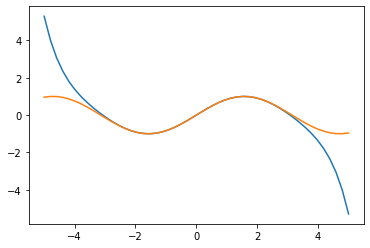

In [10]:
fig, ax = plt.subplots()
x = np.linspace(-5,5,50)
y1 = lambda x: x-(x**3)/6+(x**5)/120-(x**7)/5040
y2 = lambda x: np.sin(x)
ax.plot(x, y1(x))
ax.plot(x, y2(x))
pass

In [6]:
#2.3 Нарисовать в matplotlib окружность заданного радиуса r.

12


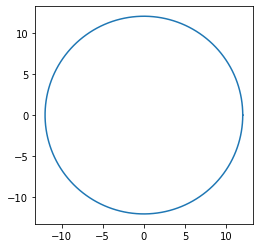

In [23]:
r = float(input())
x = np.linspace(0, 2*np.pi , 150) 
_x = r * np.cos(x) 
y = r * np.sin(x) 
figu, ax = plt.subplots() 
ax.plot( _x, y ) 
ax.set_aspect(1) 

In [8]:
#2.4 Написать функцию transformation_plot, принимающую на вход набор двумерных точек и квадратную матрицу размером 2x2

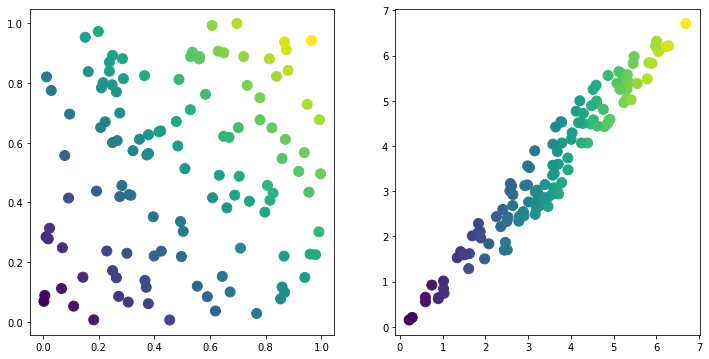

In [11]:
def transformation_plot(points, matrix):
    fig, ax = plt.subplots(1, 2, figsize=(12,6))
    x = points[:,0]
    y = points[:,1]
    
    def ss(x, y):
        return x + y
    
    c1 = ss(x, y)
    
    ax[0].scatter(x, y, 100, c=c1)
    
    after = np.dot(points, matrix.T)
    
    x = after[:,0]
    y = after[:,1]
    ax[1].scatter(x, y, 100, c=c1)
    
transformation_plot(np.random.random(size=(122, 2)), np.array([[4,3],[5,2]]))

In [10]:
#2.5 Отрисуйте график её производной на выбранном интервале [a,b], не используя её аналитическое выражение

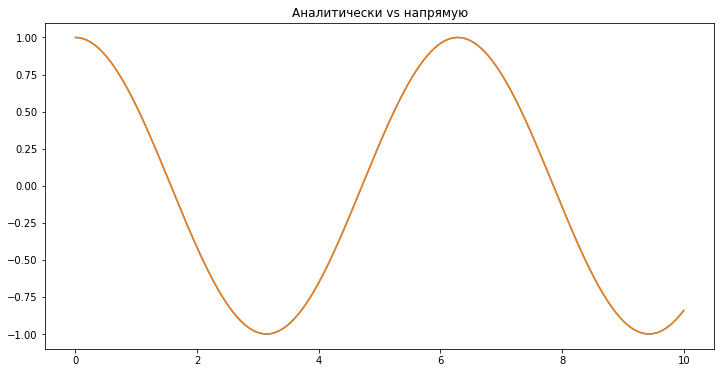

In [26]:
fig, ax = plt.subplots(figsize=(12,6))

x = np.linspace(0, 10, 500)
y = np.sin(x)

derx = x[0:-1] - x[1:]
dery = np.array(y[0:-1]) - np.array(y[1:])

ansy = np.divide(dery, derx)
ansx = (x[0:-1] + x[1:])/2

ax.plot(ansx, ansy)
ax.plot(x, np.cos(x))
ax.set_title('Аналитически vs напрямую')
pass


In [12]:
#2.6 Определить пропорцию векторов v в V, для которых угол(v,q) < 90/30 градусов

In [111]:
count = 122

V = np.random.random(size=(count, 2)) - 0.5
q = np.array([2,1])

counter90 = 0
counter30 = 0

V = np.apply_along_axis(lambda row: row.dot(q)/(np.linalg.norm(q) * np.linalg.norm(row)), 1, V)


print('Доля векторов с углом < 90:', (np.arccos(V)*180/np.pi < 90).sum()/count)
print('Доля векторов с углом < 30:', (np.arccos(V)*180/np.pi < 30).sum()/count)

Доля векторов с углом < 90: 0.47540983606557374
Доля векторов с углом < 30: 0.18032786885245902


In [14]:
#2.7 Дан гиперкуб и вписанная в него гиперсфера. Через сэмплинг точек внутри гиперкуба, оценить отношение объёма

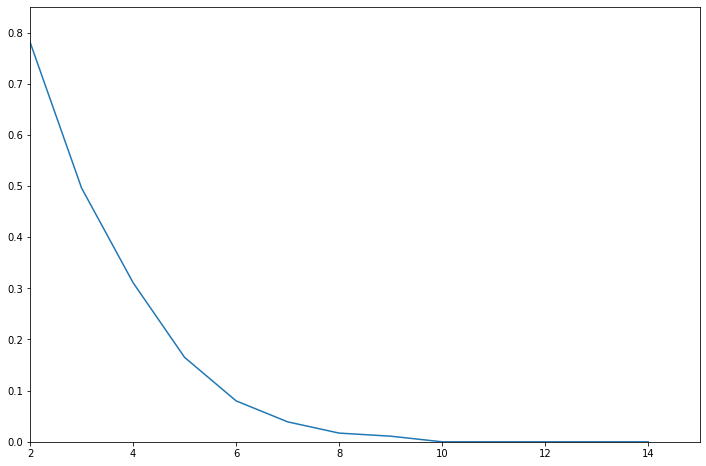

In [7]:
ans = []
for i in range(2, 15):
    points = np.random.random(size=(1000, i))
    points = np.apply_along_axis(lambda arr: sum(np.square(arr)), 1, points)
    ans.append((1 >= points).sum()/1000)
    
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_ylim(0, 0.85)
ax.set_xlim(2, 15)
ax.plot(range(2, 15), ans, 100)
pass

In [16]:
#2.8  Дана матрица X размером N * d. Напишите функцию, которая преобразует каждую i-й столбец матрицы следующим образом:

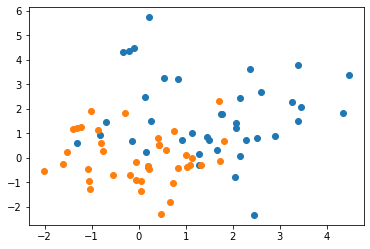

In [27]:
def foo(mat):
    return np.apply_along_axis(lambda row: (row - np.mean(row))/np.std(row), 0, mat)   
        
a = np.random.multivariate_normal(mean=[1,2],cov=[[2,1],[1,3]], size=[20,2])

fig, ax = plt.subplots()
ax.scatter(a[:,0], a[:,1])

a = foo(a)

ax.scatter(a[:,0], a[:,1])
pass

In [18]:
#2.9(а) Сгенерировать 100 значений из нормального распределения. Построить гистограмму относительной частоты

Мат. ожидание: 0.196 (Рельное: 0)
Дисперсия: 1.155 (Реальная: 1)


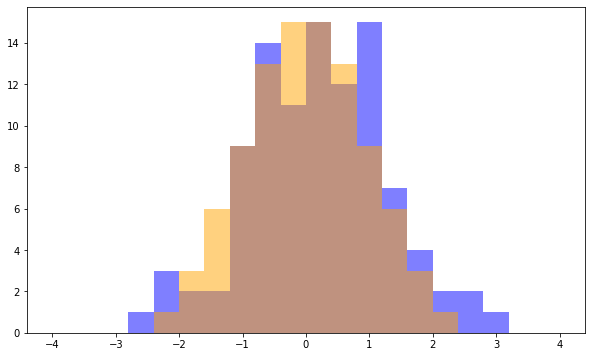

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))

_norm = np.random.randn(100)

bins = np.linspace(-4, 4, 21)

_y = (abs((norm(loc = 0 , scale = 1).cdf(bins[:-1])-norm(loc = 0 , scale = 1).cdf(bins[1:])))*100).astype(int)
        
y = np.random.randn(100)    
ax.hist(y, bins=bins, facecolor="blue", alpha=0.5)

mat = round(np.average(y),3)

print('Мат. ожидание:', mat, '(Рельное: 0)')
print('Дисперсия:', round(np.var(y), 3), '(Реальная: 1)')

ax.bar((bins[:-1] + bins[1:])/2, height=_y, facecolor="orange", alpha=0.5, width = 0.4)
pass

In [ ]:
#2.9(б) проведите 100+ экспериментов с генерацией 20 значений из нормального распределения. Оцените дисперсию через:

In [178]:
disp1higher = 0
disp2higher = 0
error1 = np.array([])
error2 = np.array([])
for k in range(100):
    normies = np.random.randn(20)
    
    disp1 = np.var(normies)
    disp2 = np.var(normies, ddof = 1)
    
    error1 = np.append(error1, (1 - disp1)**2)
    error2 = np.append(error2, (1 - disp2)**2)
    if disp1 > 1:
        disp1higher += 1
    if disp2 > 1:
        disp2higher += 1
print('Фрмула с 1/n превысила реальную дисперсию', disp1higher, 'раз, недооценила', 100-disp1higher, 'раз')
print('Средний квадрат ошибки:', round(np.average(error1),3))
print('Фрмула с 1/(n-1) превысила реальную дисперсию', disp2higher, 'раз, недооценила', 100-disp2higher, 'раз')
print('Средний квадрат ошибки:', round(np.average(error2),3))

Фрмула с 1/n превысила реальную дисперсию 43 раз, недооценила 57 раз
Средний квадрат ошибки: 0.1
Фрмула с 1/(n-1) превысила реальную дисперсию 48 раз, недооценила 52 раз
Средний квадрат ошибки: 0.111


In [20]:
#3.1 Решить задачу коммивояжера, заданную на полном графе, эвристическими методами

In [215]:
def dist(a,b):
    return sqrt((a[1] - b[1])**2 + (a[2] - b[2])**2)


nodes = []
file = open('tsp2.csv', newline='')
reader = csv.reader(file)
for node in reader:
    node = node[0].split(' ')
    node[1],node[2] = int(node[1]), int(node[2])
    nodes.append(node)

    
#Случайный поиск
ans_path = ['A']
ans_length = 999999999


for f in range(400):
    attended = {'A':1}
    current = nodes[0]
    length = 0
    path = ['A']
    while len(attended) != len(nodes):
        next = nodes[(np.random.randint(19)+1)]
        if current is next or next[0] in attended:
            continue
        path.append(next[0])
        length += dist(current, next)
        attended[next[0]] = 1
        current = next

    next = nodes[0]
    path.append(next[0])
    length += dist(current, next)
    
    if length < ans_length:
        ans_length = length
        ans_path = path
        
print('Случайный поиск:', round(ans_length), ans_path, '\n400 итераций\n')


#Жадный поиск
nodes_copy = nodes[:]
attended = {'A':1}
current = nodes[0]
length = 0
path = []
for i in range(len(nodes)):
    lengths = [dist(current, node) for node in nodes_copy]
    ind = np.argmin(lengths)
    next = nodes_copy.pop(ind)
    path.append(next[0])
    length += lengths[ind]
    attended[next[0]] = 1
    current = next
next = nodes[0]
path.append(next[0])
length += dist(current, next)
print('Жадный поиск:', round(length, 2), path, '\n1 итерация\n')


#Муравьиный алгоритм
A = 1
B = 8
Q = 40
P = 0.64
edges = {}
for k in range(len(nodes)):
    for i in range(k+1, len(nodes)):
        edges[(nodes[k][0], nodes[i][0])] = 0.2
ans_path = []
ans = 99999999999999999999
for k in range(len(nodes)):
    iteration_paths = []
    for i in range(len(nodes)):
        current = nodes[i]
        local_nodes = nodes[:]
        local_nodes.remove(current)
        local_path = [0,] #Первый элемент - расстояние
        local_path.append(nodes[i])
        for n in range(len(nodes)-1):
            weights = []
            for node in local_nodes:
                if dist(current, node)==0:
                    weights.append(9999999)
                elif (node[0], current[0]) in edges:
                    weights.append((edges[(node[0], current[0])]**A)*((1/dist(current, node))**B))
                else:
                    weights.append((edges[(current[0], node[0])]**A)*((1/dist(current, node))**B))
            next = rc(local_nodes, weights = weights)
            next = next[0]
            local_nodes.remove(next)
            local_path.append(next)
            local_path[0] += dist(current, next)
            current = next
        next = nodes[i]
        local_path.append(next)
        local_path[0] += dist(current, next)
        iteration_paths.append(local_path)
    for loc_path in iteration_paths:
        delta = Q/loc_path[0]
        for i in range(1, len(nodes)-1):
            if (loc_path[i][0], loc_path[i+1][0]) in edges:
                edges[(loc_path[i][0], loc_path[i+1][0])] = edges[(loc_path[i][0], loc_path[i+1][0])]*P + delta
            else:
                edges[(loc_path[i+1][0], loc_path[i][0])] = edges[(loc_path[i+1][0], loc_path[i][0])]*P + delta
        if loc_path[0] < ans:
            ans = loc_path[0]
            ans_path = [node[0] for node in loc_path[1:]]
inda = ans_path.index('A')
ans_path = ans_path[inda:] + ans_path[1:inda+1]
print('Муравьиный:',round(ans, 2), ans_path, '\n400 итераций\n')

Случайный поиск: 79 ['A', 'U', 'M', 'G', 'I', 'N', 'S', 'R', 'B', 'P', 'D', 'F', 'C', 'E', 'O', 'L', 'J', 'H', 'K', 'T', 'A'] 
400 итераций

Жадный поиск: 49.65 ['A', 'B', 'P', 'C', 'O', 'M', 'L', 'H', 'I', 'K', 'U', 'T', 'J', 'G', 'F', 'E', 'N', 'D', 'R', 'S', 'A'] 
1 итерация

Муравьиный: 45.46 ['A', 'S', 'P', 'B', 'R', 'D', 'C', 'O', 'M', 'N', 'E', 'F', 'G', 'H', 'L', 'K', 'I', 'J', 'T', 'U', 'A'] 
400 итераций



In [22]:
#3.2 Дан граф друзей из соцсети VK

In [29]:
graph =  nx.read_gml("VK.gml")

nodes = defaultdict(int)
graph_edges = list(graph.edges)

for edge in (graph_edges): #Определение кол-ва друзей каждого пользователя
    nodes[edge[0]] += 1
    nodes[edge[1]] += 1
    
counts = [0] * 7
pairs = list(all_pairs_shortest_path_length(graph))
for pair in pairs:
    for count in pair[1].values():
        if count > 0 and count < 7:
            counts[count-1] += 1
        else: counts[-1] += 1
            
le = sum(counts)
nodess = sorted(nodes.values(), reverse=True)

print('Число уникальных пользователей:', len(nodes))
print('Среднее число друзей:', round(graph.size()*2/len(nodes),1))
print('Медианное число друзей:', nodess[len(nodess)//2]/2 if len(nodess)%2==1 else \
      (nodess[len(nodess)//2] + nodess[len(nodess)//2-1])/2)
print('Доля пар с L=1:', round(counts[0]/le, 2))
print('Доля пар с L=2:', round(counts[1]/le, 2))
print('Доля пар с L=3:', round(counts[2]/le, 2))
print('Доля пар с L=4:', round(counts[3]/le, 2))
print('Доля пар с L=5:', round(counts[4]/le, 2))
print('Доля пар с L=6:', round(counts[5]/le, 2))
print('Доля пар с L>6 или не сущ.:', round(counts[6]/le, 3), '\n')
print('Топ 15:')
[print(node[0], ': ', node[1], sep='') for node in sorted(nodes.items(), key=lambda node: node[1], reverse=True)[:15]]
pass

Число уникальных пользователей: 3766
Среднее число друзей: 22.0
Медианное число друзей: 15.0
Доля пар с L=1: 0.01
Доля пар с L=2: 0.1
Доля пар с L=3: 0.45
Доля пар с L=4: 0.34
Доля пар с L=5: 0.08
Доля пар с L=6: 0.01
Доля пар с L>6 или не сущ.: 0.004 

Топ 15:
154572605: 351
136435809: 211
34847138: 210
1997236: 178
472893795: 178
270418723: 167
246825563: 155
120109289: 148
83372852: 146
94780691: 140
63962118: 136
94509311: 135
150491520: 135
122784747: 132
41459412: 130


In [24]:
#3.3 Для графа из предыдущей задачи:

In [30]:
_nodes = defaultdict(int)
graph_edges = list(graph.edges)

for edge in (graph_edges): #Определение кол-ва друзей каждого пользователя
    _nodes[edge[0]] += 1
    _nodes[edge[1]] += 1
    
connected = {key:[con[0] for con in graph_edges if con[1] == key] + [con[1] for con in graph_edges if con[0] == key] \
             for key in list(_nodes.keys())}

#ranks = nx.pagerank(graph)
_sum = 0
attended = defaultdict(int)
current = '7036929'
nodes_keys = list(_nodes.keys())

for i in tqdm(range(10000000)):
    if np.random.random() > 0.85:
        next = rc(nodes_keys)[0]
    else:
        next = rc(connected[current])[0]
    _sum += 1
    attended[next] += 1
    current = next
    
ranks = {key:attended[key]/_sum for key in attended.keys()}
top_ranks = sorted([(key, ranks[key]) for key in ranks], key = lambda a: a[1], reverse=True)[:100]

degrees = {key:_nodes[key]/(len(graph_edges)*2) for key in _nodes.keys()}
top_degrees = sorted([(key, degrees[key]) for key in degrees], key = lambda a: a[1], reverse=True)[:100]

diff = {key[0]:degrees[key[0]] - ranks[key[0]] for key in top_ranks}
diff_top = sorted([(key, diff[key]) for key in diff.keys()], key = lambda a: a[1], reverse=True)

print('PageRank больше чем степень:')
[print(int(diff[0]), ' diff:', round(diff[1], 5), sep='') for diff in diff_top if diff[1] > 0]
pass

100%|██████████████████████████████████████████████████████████████████| 10000000/10000000 [00:21<00:00, 462722.15it/s]

PageRank больше чем степень:
154572605 diff:0.00085
34847138 diff:0.00068
136435809 diff:0.00066
270418723 diff:0.00058
472893795 diff:0.00056
63962118 diff:0.00049
41459412 diff:0.00048
267387321 diff:0.00047
155215950 diff:0.00047
83372852 diff:0.00045
267156959 diff:0.00045
150491520 diff:0.00044
94509311 diff:0.00044
147406188 diff:0.00044
1997236 diff:0.0004
122784747 diff:0.0004
147743003 diff:0.0004
152206965 diff:0.00039
311943718 diff:0.00039
93960849 diff:0.00039
223445537 diff:0.00038
84534254 diff:0.00038
89917726 diff:0.00038
171562973 diff:0.00036
182392472 diff:0.00036
94780691 diff:0.00036
108448130 diff:0.00036
152365262 diff:0.00036
267527624 diff:0.00035
234187160 diff:0.00035
118359763 diff:0.00034
231047362 diff:0.00034
416043133 diff:0.00034
43691748 diff:0.00034
57495875 diff:0.00034
88827556 diff:0.00033
132192931 diff:0.00033
443834545 diff:0.00033
12393140 diff:0.00033
309879656 diff:0.00033
181647470 diff:0.00033
178654794 diff:0.00033
120109289 diff:0.00032
